In [1]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 287 (delta 10), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (287/287), 301.25 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Updating files: 100% (231/231), done.


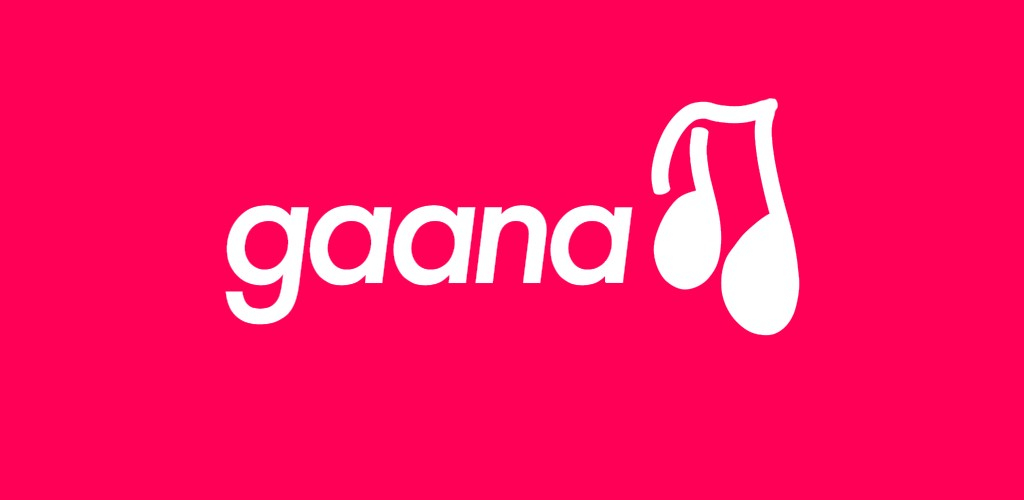

Based on the exploration we did, the dataset located at `/content/Datasets/Gaana/songs.csv` contains information about songs from Gaana. Here's a description of the columns:

*   **`name`**: The name of the song.
*   **`singer`**: The name(s) of the singer(s) of the song. This column can contain multiple singers separated by a pipe `|`.
*   **`singer_id`**: A unique identifier for the singer(s). Similar to the `singer` column, it can contain multiple singer IDs separated by a pipe `|`.
*   **`duration`**: The duration of the song in a time format (e.g., 'MM:SS' or 'HH:MM:SS').
*   **`link`**: The unique link to the song on Gaana. This column was used to identify and remove duplicate songs.
*   **`language`**: The language of the song.

The dataset has been cleaned by removing duplicates based on the 'link' and a combination of 'name', 'singer', 'singer_id', and 'duration'. A new column `duration_in_sec` was also added which converts the duration to seconds.

In [2]:
import pandas as pd
import numpy as np

# 1.) Overall Data Exploration

In [3]:
df = pd.read_csv('/content/Datasets/Gaana/songs.csv')

In [4]:
df

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali


## 1.3) Further Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41355 entries, 0 to 41354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       41355 non-null  object
 1   singer     41355 non-null  object
 2   singer_id  41355 non-null  object
 3   duration   41355 non-null  object
 4   link       41355 non-null  object
 5   language   41355 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [6]:
df.describe()

,name,singer,singer_id,duration,link,language
count,41355,41355,41355,41355,41355,41355
unique,31534,6196,6580,1309,36361,16
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,03:02,/ek-baar-zara-phir-keh-do,Telugu
freq,26,1410,1410,447,2,4996


In [7]:
df['language'].value_counts()

,count
language,
Telugu,4996
Hindi,4993
Old,4993
Marathi,4699
Tamil,4677
Punjabi,3818
Kannada,3559
Urdu,3116
Gujarati,2115


In [8]:
len(df[df['language'] == 'Hindi'])

4993

In [9]:
for i in df['language'].unique():
  print(i, len(df[df['language'] == i]))

Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Old 4993
Malayalam 479
Marathi 4699
Telugu 4996
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


In [10]:
language_counts = {}
for language in df['language']:
    if language in language_counts:
        language_counts[language] += 1
    else:
        language_counts[language] = 1

for language, count in language_counts.items():
    print(f"{language}: {count}")

Urdu: 3116
Gujarati: 2115
Tamil: 4677
Kannada: 3559
Rajasthani: 541
Haryanvi: 228
Punjabi: 3818
Hindi: 4993
Old: 4993
Malayalam: 479
Marathi: 4699
Telugu: 4996
Odia: 940
Bhojpuri: 519
Assamese: 724
Bengali: 958


In [11]:
### Filter out a value where Singer is Jagjit singh and the language is urdu

df[(df['singer'] == 'Jagjit Singh') & (df['language'] == 'Urdu')]


,name,singer,singer_id,duration,link,language
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
7,Tum Itna Jo Muskura Rahe Ho,Jagjit Singh,/artist/jagjeet-singh-1,05:21,/tum-itna-jo-muskura-rahe-ho-12,Urdu
10,Zindagi Se Badi Saza Hi Nahi,Jagjit Singh,/artist/jagjeet-singh-1,05:03,/tujhe-milne-ki-saza-denge,Urdu
11,Kabse Hoon Kya Bataon,Jagjit Singh,/artist/jagjeet-singh-1,04:00,/kab-se-hoon-kya-bataoon,Urdu
13,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi,Urdu
15,Zulmat Kade Mein Mere,Jagjit Singh,/artist/jagjeet-singh-1,03:48,/zulmat-kade-mein-mere,Urdu
16,Na Tha Kuchh To Khuda Tha,Jagjit Singh,/artist/jagjeet-singh-1,03:24,/na-tha-kuchh-to-khuda-tha,Urdu
22,Woh Firaaq Aur Woh Visal Kahan,Jagjit Singh,/artist/jagjeet-singh-1,04:23,/woh-firaaq-aur-woh-visal-kahan,Urdu
23,Phir Kuch Ek Dil Ko Beqarari Hai,Jagjit Singh,/artist/jagjeet-singh-1,02:36,/phir-kuch-ek-dil-ko-beqarari-hai,Urdu


## 1.4) Null Values

In [12]:
df.isnull().sum()

,0
name,0
singer,0
singer_id,0
duration,0
link,0
language,0


## 1.5) Checking for duplicates

In [13]:
df['link'].duplicated().sum()

np.int64(4994)

In [14]:
df[df['link'].duplicated()]

,name,singer,singer_id,duration,link,language
23047,Bheegi Bheegi Raaton Mein,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,03:54,/bheegi-bheegi-raaton-mein,Old
23048,Aap Ki Ankhon Mein Kuch,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:09,/aap-ki-ankhon-mein-kuchh,Old
23049,Tum Aa Gaye Ho Noor Aa Gaya,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:13,/tum-aa-gaye-ho-noor-aa-gaya,Old
23050,Hamen Tumse Pyar Kitna,Kishore Kumar,/artist/kishore-kumar,04:02,/hamen-tumse-pyar-kitna-2,Old
23051,Tere Bina Zindagi Se,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,05:54,/tere-bina-zindagi-se-1,Old
...,...,...,...,...,...,...
28036,Apne Hathon Ki Lakiron Mein,Manhar Udhas,/artist/manhar-udhas,06:43,/apne-hathon-ki-lakiron-mein,Old
28037,Gori Chalo Na Hans Ki Chaal,Asha Bhosle|Mohammed Rafi,/artist/asha-bhosle-1|/artist/mohammad-rafi,03:33,/gori-chalo-na-hans-ki-chaal,Old
28038,Zindagi Ki Na Toote Ladi,Lata Mangeshkar|Nitin Mukesh,/artist/lata-mangeshkar|/artist/nitin-mukesh,07:02,/zindagi-ki-na-toote-ladi-2,Old
28039,Diwana Leke Aaya Hai,Kishore Kumar,/artist/kishore-kumar,04:39,/diwana-leke-aaya-hai-7,Old


In [15]:
df_ = df[df['link'].duplicated()]

In [16]:
df_.describe()

,name,singer,singer_id,duration,link,language
count,4994,4994,4994,4994,4994,4994
unique,3821,923,927,527,4994,2
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,04:01,/intheraa-ee-jeevitham,Old
freq,13,554,554,55,1,4993


In [17]:
len(df[df['language'] == 'Old'])

4993

In [18]:
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Old', 'Malayalam', 'Marathi', 'Telugu',
       'Odia', 'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

In [19]:
df[df['language'] == 'Old']['singer'].value_counts()

,count
singer,
Lata Mangeshkar,554
Kishore Kumar,550
Mohammed Rafi,503
Asha Bhosle,237
Kishore Kumar|Lata Mangeshkar,225
...,...
Miriam Stockley,1
Kishore Kumar|Annette Pinto,1
Amit Kumar|Asha Bhosle|R. D. Burman,1


1) Checking for proof that are the songs of hindi and old are same

In [20]:
df_ = df[(df['language'] == 'Hindi') | (df['language'] == 'Old')]

In [21]:
df_

,name,singer,singer_id,duration,link,language
18054,Bheegi Bheegi Raaton Mein,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,03:54,/bheegi-bheegi-raaton-mein,Hindi
18055,Aap Ki Ankhon Mein Kuch,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:09,/aap-ki-ankhon-mein-kuchh,Hindi
18056,Tum Aa Gaye Ho Noor Aa Gaya,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:13,/tum-aa-gaye-ho-noor-aa-gaya,Hindi
18057,Hamen Tumse Pyar Kitna,Kishore Kumar,/artist/kishore-kumar,04:02,/hamen-tumse-pyar-kitna-2,Hindi
18058,Tere Bina Zindagi Se,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,05:54,/tere-bina-zindagi-se-1,Hindi
...,...,...,...,...,...,...
28035,Nigahen Milane Ko Jee Chahta Hai,Asha Bhosle,/artist/asha-bhosle-1,06:34,/nigahen-milane-ko-jee-chahta-hai-3,Old
28036,Apne Hathon Ki Lakiron Mein,Manhar Udhas,/artist/manhar-udhas,06:43,/apne-hathon-ki-lakiron-mein,Old
28037,Gori Chalo Na Hans Ki Chaal,Asha Bhosle|Mohammed Rafi,/artist/asha-bhosle-1|/artist/mohammad-rafi,03:33,/gori-chalo-na-hans-ki-chaal,Old
28038,Zindagi Ki Na Toote Ladi,Lata Mangeshkar|Nitin Mukesh,/artist/lata-mangeshkar|/artist/nitin-mukesh,07:02,/zindagi-ki-na-toote-ladi-2,Old


In [22]:
df_.duplicated().sum()

np.int64(0)

In [23]:
df_['link'].duplicated().sum()

np.int64(4993)

## 1.6) Removing Duplicates

In [24]:
df.drop_duplicates(subset = 'link', inplace=True)
df

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali


In [25]:
df.describe()

,name,singer,singer_id,duration,link,language
count,36361,36361,36361,36361,36361,36361
unique,31534,6196,6580,1309,36361,15
top,Padhyams,S. P. Balasubrahmanyam,/artist/s-p-balasubrahamanyam,03:02,/tomar-je-oi-haater-mala,Telugu
freq,20,1151,1155,417,1,4995


In [26]:
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Malayalam', 'Marathi', 'Telugu', 'Odia',
       'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

# 2) Exploring every column

## 2.1) Names

In [27]:
df['name'].describe()

,name
count,36361
unique,31534
top,Padhyams
freq,20


In [28]:
df[df['name'] == 'Padhyams']

,name,singer,singer_id,duration,link,language
34123,Padhyams,Ghanatasala,/artist/ghanatasala,01:21,/poem-1-1,Telugu
34236,Padhyams,P. Susheela|Madhavapeddi Satyam,/artist/p-suseela-2|/artist/madhavapeddi-satyam,08:00,/padyams1,Telugu
34340,Padhyams,Ghanatasala|P. Susheela|P Leela|S. Varalakshmi,/artist/ghanatasala|/artist/p-suseela-2|/artis...,19:56,/padhyams-2,Telugu
34441,Padhyams,Ghanatasala,/artist/ghanatasala,04:47,/padyams-narthanasala,Telugu
34512,Padhyams,Ghanatasala|Madhavapeddi Satyam,/artist/ghanatasala|/artist/madhavapeddi-satyam,05:06,/padyamssri-krishnarjuna-yuddham,Telugu
34855,Padhyams,Ghanatasala|S. Janaki,/artist/ghanatasala|/artist/s-janaki,01:48,/dhanyosmi-matha-sukravarapu-poddu,Telugu
34869,Padhyams,Ghanatasala,/artist/ghanatasala,56:19,/padyams-seetharama-kalyanam,Telugu
34922,Padhyams,Ghanatasala,/artist/ghanatasala,50:37,/padyams-gudi-gantalu,Telugu
35153,Padhyams,Ghanatasala|Madhavapeddi Satyam,/artist/ghanatasala|/artist/madhavapeddi-satyam,03:23,/padyams-sri-venketswara-mahathymam,Telugu
35281,Padhyams,Ghanatasala|Madhavapeddi Satyam,/artist/ghanatasala|/artist/madhavapeddi-satyam,04:15,/padyams-with-dialogues,Telugu


In [29]:
df['name'].value_counts()

,count
name,
Padhyams,20
V,14
Ninna Nanna,14
O Mere Dil Ke Chain,13
Naguva Nayana,12
...,...
En Chandaagi Yaavano,1
Yavva Byati Byaati - Yanaadida,1
Dhyaana Slokas Part 2,1


## 2.2) Singers

In [30]:
df['singer']

,singer
0,Chitra Singh|Jagjit Singh
1,Chitra Singh|Jagjit Singh
2,Jagjit Singh
3,Chitra Singh
4,Jagjit Singh
...,...
41350,Kishore Kumar
41351,Feroza Begum
41352,Sandhya Mukherjee|Hemant Kumar
41353,Ajoy Chakrabarty


In [31]:
df['singer'].describe()

,singer
count,36361
unique,6196
top,S. P. Balasubrahmanyam
freq,1151


In [32]:
df['singer'].value_counts()

,count
singer,
S. P. Balasubrahmanyam,1151
Asha Bhosle,1037
P. Susheela,1019
Lata Mangeshkar,856
S. Janaki,728
...,...
Rakhi Sarkar,1
Amar Roy|Asha Bhosle|Chittapriya Mukherjee,1
Ayesha Sarkar,1


In [33]:
df.columns

Index(['name', 'singer', 'singer_id', 'duration', 'link', 'language'], dtype='object')

## 3) Singer ID

In [34]:
df['singer_id'].describe()

,singer_id
count,36361
unique,6580
top,/artist/s-p-balasubrahamanyam
freq,1155


In [35]:
df['singer_id'].value_counts()

,count
singer_id,
/artist/s-p-balasubrahamanyam,1155
/artist/asha-bhosle-1,1037
/artist/p-suseela-2,1019
/artist/lata-mangeshkar,856
/artist/s-janaki,728
...,...
/artist/hariharan|/artist/kavita-subramaniam,1
/artist/p-jayachandran-1|/artist/swarna,1
/artist/j-p-chandrababu,1


In [36]:
df['duration'].value_counts()

,count
duration,
03:02,417
04:00,385
03:21,365
05:00,358
03:03,353
...,...
14:34,1
58:27,1
13:24,1


In [37]:
df['link'].value_counts()

,count
link,
/tomar-je-oi-haater-mala,1
/dil-e-nadan-tujhe-3,1
/agar-hum-kahen-aur-woh-muskura-den,1
/unke-dekhe-se,1
/yeh-na-thi-hamari-qismat-2,1
...,...
/hazaron-khwahishen-aisi,1
/dialouge-12,1
/kab-se-hoon-kya-bataoon,1


<Axes: xlabel='language'>

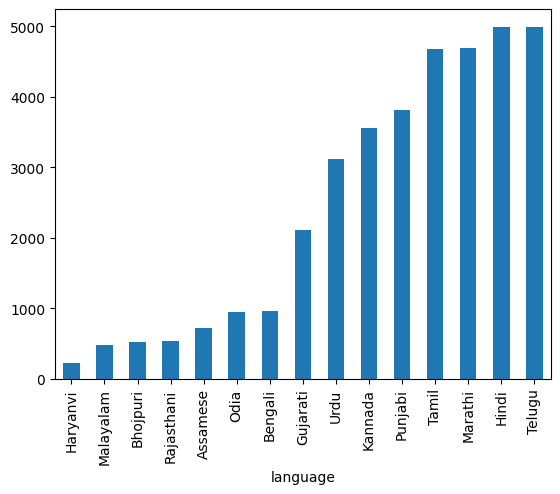

In [38]:
df['language'].value_counts().sort_values(ascending=True).plot(kind = 'bar')

# 3) Data Cleaning

## 3.1) Cleaning Duration

In [39]:
for i in df['duration'][:10]:
  print(i, int(i.split(':')[0])*60 + int(i.split(':')[1]))

05:00 300
06:26 386
03:41 221
04:26 266
05:39 339
07:59 479
04:48 288
05:21 321
03:09 189
04:24 264


In [40]:
lst = []
for i in range(10):
  lst.append(i**2)

print(lst)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [41]:
duration = []

for i in df['duration']:
  min = int(i.split(':')[0])
  sec = int(i.split(':')[1])
  duration.append(min*60 + sec)

df['duration_in_sec'] = duration
df

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339
...,...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,203
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,236
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,456
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,269


In [42]:
df['duration_in_sec'].sort_values(ascending = False)

,duration_in_sec
818,3595
14098,3588
13282,3587
39216,3581
30833,3566
...,...
9480,19
6500,18
36778,18
35561,17


In [43]:
duration = []
for i in df['duration']:
  if len(i.split(':')) == 3:
    print(i)

01:00:21
01:00:09
01:00:08
01:09:52
01:15:45
01:05:53
01:08:04
01:00:39
05:43:00
06:03:00
01:00:45
05:48:00
05:17:00
04:20:00
06:52:00
06:04:00
05:25:00
05:05:00
06:02:00
01:16:00
05:43:00
05:16:00
05:33:00
05:00:00
01:23:22
05:00:00
06:03:00
05:48:00
07:08:00
01:23:22
06:52:00
05:05:00
04:20:00
05:33:00
05:00:00
01:02:27
01:01:08
01:04:36
01:00:05
01:07:13
02:01:49
02:04:37
02:22:18
01:09:22
01:06:19
02:17:29
02:26:54
01:04:35
01:49:40
02:37:42
02:05:46
02:13:06
02:20:03
01:07:12
01:54:41
02:27:29
02:04:16
02:20:24
01:02:51
02:53:29
01:06:19
01:52:12
01:07:38
01:05:27
01:10:41
01:01:05
02:25:50
01:01:00


In [44]:
df[df['duration'] == '06:03:00']

,name,singer,singer_id,duration,link,language,duration_in_sec
14624,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,/artist/dilshad-akhtar,06:03:00,/desi-bandri-vilayati-cheekan-1,Punjabi,363
16022,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,/artist/dilshad-akhtar,06:03:00,/desi-bandri-vilayati-cheekan,Punjabi,363


In [45]:
duration = []

for i in df['duration']:
  if len(i.split(':')) == 2:
    min = int(i.split(':')[0])
    sec = int(i.split(':')[1])
    duration.append(min*60 + sec)

  elif len(i.split(':')) == 3:
    hr = int(i.split(':')[0])
    min = int(i.split(':')[1])
    sec = int(i.split(':')[2])
    duration.append(hr*60*60 +  min*60 + sec)

df['duration_in_sec'] = duration
df

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339
...,...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,203
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,236
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,456
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,269


In [46]:
df['duration_in_sec'].sort_values(ascending = False)

,duration_in_sec
16093,25680
15000,24720
16352,24720
15025,21840
14624,21780
...,...
9480,19
36778,18
6500,18
35561,17


In [47]:
df

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339
...,...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,203
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,236
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,456
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,269


In [48]:
df.sort_values(by = 'duration_in_sec', ascending = False).head(20)

,name,singer,singer_id,duration,link,language,duration_in_sec
16093,Haye Tumba,Dilshad Akhtar,/artist/dilshad-akhtar,07:08:00,/haye-tumba,Punjabi,25680
15000,Bum Bum Lahiri,Dilshad Akhtar,/artist/dilshad-akhtar,06:52:00,/bum-bum-lahiri-1,Punjabi,24720
16352,Bum Bum Lahiri,Dilshad Akhtar,/artist/dilshad-akhtar,06:52:00,/bum-bum-lahiri,Punjabi,24720
15025,Kanu Atharu Bahoundi,Dilshad Akhtar,/artist/dilshad-akhtar,06:04:00,/kanu-atharu-bahoundi,Punjabi,21840
14624,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,/artist/dilshad-akhtar,06:03:00,/desi-bandri-vilayati-cheekan-1,Punjabi,21780
16022,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,/artist/dilshad-akhtar,06:03:00,/desi-bandri-vilayati-cheekan,Punjabi,21780
15259,Kunda Khol Basantariye,Dilshad Akhtar,/artist/dilshad-akhtar,06:02:00,/kunda-khol-basantariye,Punjabi,21720
14655,Ghund Kad Lai,Dilshad Akhtar,/artist/dilshad-akhtar,05:48:00,/ghund-kad-lai-1,Punjabi,20880
16027,Ghund Kad Lai,Dilshad Akhtar,/artist/dilshad-akhtar,05:48:00,/ghund-kad-lai,Punjabi,20880
15402,Man Wich Vasnai,Dilshad Akhtar,/artist/dilshad-akhtar,05:43:00,/man-wich-vasnai,Punjabi,20580


# 4.) Data Analysis

In [49]:
df.head(2)

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386


In [50]:
'''

KPI

-- Overall Analysis

1. Total Songs
2. Total Singers
3. Languages
4. Total Songs Played
5. Play in Hours | 100 Million Hours + Streamed
6. Genre

-- Yearly Analysis
7. Top Song of the Year
8. Weekly Top Songs

-- Monthly Analysis


-- Daily Analysis


'''

'\n\nKPI\n\n-- Overall Analysis\n\n1. Total Songs\n2. Total Singers\n3. Languages\n4. Total Songs Played\n5. Play in Hours | 100 Million Hours + Streamed\n6. Genre\n\n-- Yearly Analysis\n7. Top Song of the Year\n8. Weekly Top Songs\n\n-- Monthly Analysis\n\n\n-- Daily Analysis\n\n\n'

## 4.1 Total number of unique songs

In [51]:
df.head(2)

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386


In [52]:
df['link'].nunique()

36361

## 4.2 Total unique languages

In [53]:
df['language'].nunique()

15

## 4.3) Total Unique Singers

In [54]:
df['singer'].nunique()

6196

In [55]:
df['singer_id'].nunique()

6580

In [56]:
lst = []

for i in df['singer_id']:
  lst = lst + i.split('|')

print(len(set(lst)))

4528


In [57]:
df['singer_id'].str.split('|').explode().nunique()

4528

In [58]:
df['singer'].str.split('|').explode().nunique()

3940

In [59]:
# Create a sample DataFrame with a list in one column
data = {'col1': ['A', 'B', 'C'],
        'col2': [[1, 2], [3, 4, 4], [5]]}
df_explode_example = pd.DataFrame(data)
print("Original DataFrame:")
display(df_explode_example)

# Use explode on 'col2'
df_exploded = df_explode_example.explode('col2')
print("\nDataFrame after explode:")
display(df_exploded)

Original DataFrame:


,col1,col2
0,A,"[1, 2]"
1,B,"[3, 4, 4]"
2,C,[5]



DataFrame after explode:


,col1,col2
0,A,1
0,A,2
1,B,3
1,B,4
1,B,4
2,C,5


### 4.4) Accumulative duration of songs

In [60]:
df['duration_in_sec'].sum()

np.int64(11377267)

In [61]:
'200 hours 13 minutes and 44 seconds'

'200 hours 13 minutes and 44 seconds'

In [64]:
'11377267' -> 'x Hours y min z seconds'

In [66]:
hrs = 11377267//3600

In [67]:
mins = (11377267%3600) // 60

In [68]:
sec = (11377267%3600) % 60


In [69]:
print(f'{hrs} hours {mins} Minutes {sec} Seconds')

3160 hours 21 Minutes 7 Seconds


In [70]:
total_seconds = df['duration_in_sec'].sum()
days = total_seconds // (24 * 3600)
remaining_seconds_after_days = total_seconds % (24 * 3600)
hours = remaining_seconds_after_days // 3600
remaining_seconds_after_hours = remaining_seconds_after_days % 3600
minutes = remaining_seconds_after_hours // 60
seconds = remaining_seconds_after_hours % 60
print(f'Total Duration: {days} Days {hours} Hours {minutes} Minutes {seconds} Seconds')

Total Duration: 131 Days 16 Hours 21 Minutes 7 Seconds


### 4.5) Top 10 Songs

In [71]:
df.head(2)

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386


In [72]:
df.groupby('name')['name'].count().sort_values(ascending=False).head(10)

,name
name,
Padhyams,20
Ninna Nanna,14
V,14
O Mere Dil Ke Chain,13
Tuma Gaan Mahu Machhi,12
Yedhalo Tholivalape,12
Naguva Nayana,12
Ahe Ramahari,12
Hamen Tumse Pyar Kitna,11


### 4.6) Top 5 Languages

<Axes: xlabel='language'>

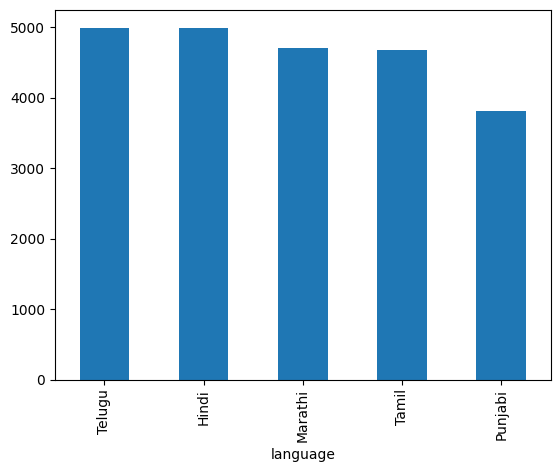

In [73]:
df.groupby('language')['language'].count().sort_values(ascending = False).head(5).plot(kind = 'bar')

/tmp/ipython-input-74-319416119.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')
/tmp/ipython-input-74-319416119.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_languages.index, y=top_10_languages.values, palette=[cmap(norm(value)) for value in top_10_languages.values])


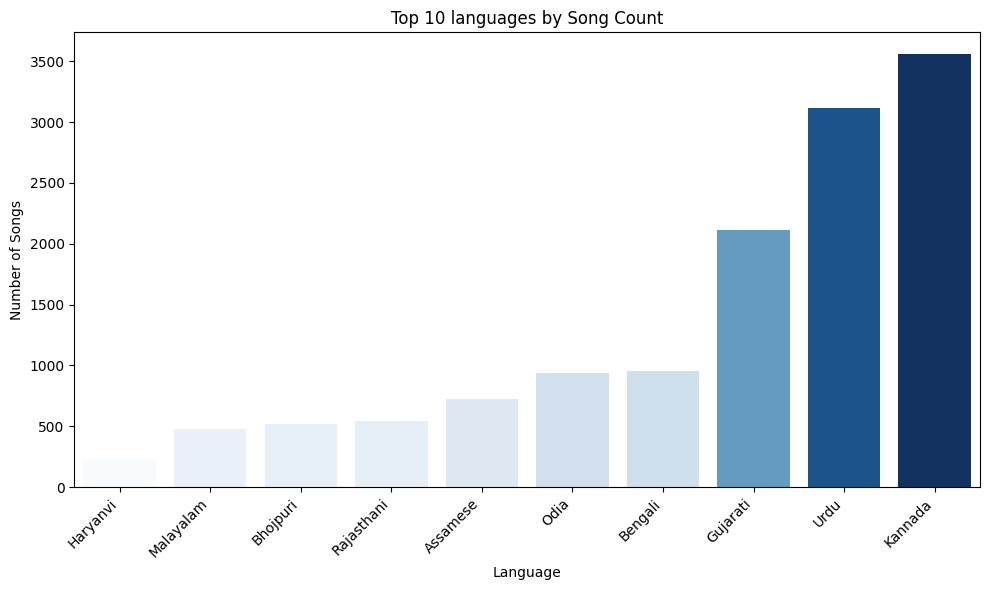

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

language_counts = df['language'].value_counts().sort_values(ascending = True)

# Select top 10 languages
top_10_languages = language_counts.head(10)

# Create a colourmap from light red to dark red
cmap = plt.cm.get_cmap('Blues')

# Normalize the counts to the range [0,1] for colourmapping
norm = plt.Normalize(top_10_languages.min(), top_10_languages.max())

# create the bar plot with custom colours
plt.figure(figsize = (10, 6))
sns.barplot(x=top_10_languages.index, y=top_10_languages.values, palette=[cmap(norm(value)) for value in top_10_languages.values])
plt.title('Top 10 languages by Song Count')
plt.xlabel('Language')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
import plotly.express as px

language_counts = df['language'].value_counts().sort_values(ascending = False)

# Select top 10 languages
top_10_languages = language_counts.head(10)

# Create a plotly bar chart
fig = px.bar(x=top_10_languages.index, y=top_10_languages.values,
             labels={'x': 'language', 'y': 'Number of Songs'},
             title='Top 10 Languages by Song Count (Plotly)',
             color=top_10_languages.values,
             color_continuous_scale='Reds') # use Reds colormap

fig.update_layout(xaxis_tickangle=-45)
fig.show()